In [1]:
import pandas as pd
import datetime
import os
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

<Figure size 864x360 with 0 Axes>

In [14]:
dtypes = {
    'ip': 'uint32',
    'app': 'uint16',
    'device': 'uint16',
    'os': 'uint16',
    'channel': 'uint16',
    'is_attributed': 'uint8'
}
to_read = ['click_time', 'is_attributed']
to_parse = ['click_time']

In [15]:
train = pd.read_csv('../data/raw/train.csv', usecols=to_read, dtype=dtypes, parse_dates=to_parse)
train.head()

,click_time,is_attributed
0,2017-11-06 14:32:21,0
1,2017-11-06 14:33:34,0
2,2017-11-06 14:34:12,0
3,2017-11-06 14:34:52,0
4,2017-11-06 14:35:08,0


In [27]:
train['click_time_h'] = train['click_time'].dt.round('H')
# train.drop(columns=['click_time'], inplace=True)

In [28]:
train['click_time_h'].unique()

array(['2017-11-06T15:00:00.000000000', '2017-11-06T16:00:00.000000000',
       '2017-11-06T17:00:00.000000000', '2017-11-06T18:00:00.000000000',
       '2017-11-06T19:00:00.000000000', '2017-11-06T20:00:00.000000000',
       '2017-11-06T21:00:00.000000000', '2017-11-06T22:00:00.000000000',
       '2017-11-06T23:00:00.000000000', '2017-11-07T00:00:00.000000000',
       '2017-11-07T01:00:00.000000000', '2017-11-07T02:00:00.000000000',
       '2017-11-07T03:00:00.000000000', '2017-11-07T04:00:00.000000000',
       '2017-11-07T05:00:00.000000000', '2017-11-07T06:00:00.000000000',
       '2017-11-07T07:00:00.000000000', '2017-11-07T08:00:00.000000000',
       '2017-11-07T09:00:00.000000000', '2017-11-07T10:00:00.000000000',
       '2017-11-07T11:00:00.000000000', '2017-11-07T12:00:00.000000000',
       '2017-11-07T13:00:00.000000000', '2017-11-07T14:00:00.000000000',
       '2017-11-07T15:00:00.000000000', '2017-11-07T16:00:00.000000000',
       '2017-11-07T17:00:00.000000000', '2017-11-07

In [17]:
train[['click_time_h','is_attributed']].groupby(['click_time_h'], as_index=True).count().plot()
plt.title('HOURLY CLICK FREQUENCY');
plt.ylabel('Number of Clicks');

train[['click_time_h','is_attributed']].groupby(['click_time_h'], as_index=True).mean().plot()
plt.title('HOURLY CONVERSION RATIO');
plt.ylabel('Converted Ratio');

KeyError: "['click_time_h'] not in index"

In [18]:
to_read = ['click_time']
to_parse = ['click_time']
df_test = pd.read_csv('../data/raw/test.csv', usecols=to_read, dtype=dtypes, parse_dates=to_parse)

In [19]:
df_test['click_time_h'] = df_test['click_time'].dt.round('H')
# df_test.drop(columns=['click_time'], inplace=True)

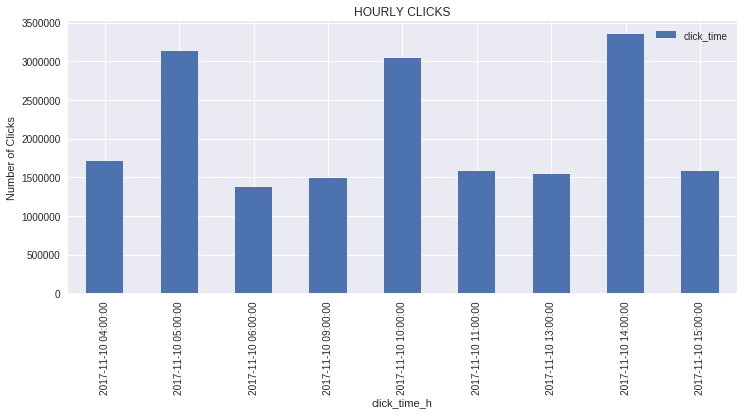

In [22]:
df_test[['click_time', 'click_time_h']].groupby(['click_time_h'], as_index=True).count().plot(kind='bar')
plt.title('HOURLY CLICKS');
plt.ylabel('Number of Clicks');

In [24]:
df_test['click_time_h'].unique()

array(['2017-11-10T04:00:00.000000000', '2017-11-10T05:00:00.000000000',
       '2017-11-10T06:00:00.000000000', '2017-11-10T09:00:00.000000000',
       '2017-11-10T10:00:00.000000000', '2017-11-10T11:00:00.000000000',
       '2017-11-10T13:00:00.000000000', '2017-11-10T14:00:00.000000000',
       '2017-11-10T15:00:00.000000000'], dtype='datetime64[ns]')